In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Importing the dataset
df = pd.read_csv("2_shopping_trends.csv")
df

,Age,Gender,Item Purchased,Category,Location,Season,Review Rating,Discount Applied,Promo Code Used,Previous Purchases,Frequency of Purchases,Purchase Intent Category
0,33,Male,Backpack,Accessories,Malaysia,Summer,4.5,Yes,Yes,44,Fortnightly,Wants-based
1,39,Female,Jeans,Clothing,Spain,Winter,5.0,No,No,23,Fortnightly,Wants-based
2,23,Male,Dress,Clothing,Australia,Spring,3.2,No,No,30,Weekly,Wants-based
3,39,Male,Backpack,Accessories,United Kingdom,Fall,3.1,Yes,Yes,19,Weekly,Wants-based
4,34,Female,Gloves,Accessories,Nigeria,Winter,2.8,No,No,16,Annually,Wants-based
...,...,...,...,...,...,...,...,...,...,...,...,...
12939,53,Male,Sneakers,Footwear,Canada,Fall,4.4,Yes,Yes,1,NaN,Impulsive
12940,54,Male,Jewelry,Accessories,Thailand,Summer,4.3,Yes,Yes,1,NaN,Impulsive
12941,56,Female,Boots,Footwear,United States,Summer,3.8,No,No,2,NaN,Impulsive
12942,52,Female,Coat,Outerwear,Spain,Spring,3.0,No,No,2,NaN,Impulsive


In [3]:
# Drop unused columns
cleaned_df = df.copy()
cleaned_df.drop(columns=[col for col in df.columns if col not in ['Gender', 'Item Purchased', 'Category', 'Location', 'Season',
                                                                  'Discount Applied', 'Promo Code Used', 'Purchase Intent Category', 
                                                                  'Frequency of Purchases']], inplace=True)
cleaned_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12944 entries, 0 to 12943
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Gender                    12944 non-null  object
 1   Item Purchased            12944 non-null  object
 2   Category                  12944 non-null  object
 3   Location                  12944 non-null  object
 4   Season                    12944 non-null  object
 5   Discount Applied          12944 non-null  object
 6   Promo Code Used           12944 non-null  object
 7   Frequency of Purchases    3900 non-null   object
 8   Purchase Intent Category  12944 non-null  object
dtypes: object(9)
memory usage: 910.3+ KB


In [4]:
#check missing values
print("\nMising Value:\n",cleaned_df.isnull().sum())

#check datatype for each columns
print("\nDatatype for each column\n",cleaned_df.dtypes)

#check duplicate values
df.duplicated().sum()


Mising Value:
 Gender                         0
Item Purchased                 0
Category                       0
Location                       0
Season                         0
Discount Applied               0
Promo Code Used                0
Frequency of Purchases      9044
Purchase Intent Category       0
dtype: int64

Datatype for each column
 Gender                      object
Item Purchased              object
Category                    object
Location                    object
Season                      object
Discount Applied            object
Promo Code Used             object
Frequency of Purchases      object
Purchase Intent Category    object
dtype: object


2056

In [23]:
# handle missing values
cleaned_df['Frequency of Purchases'] = cleaned_df['Frequency of Purchases'].fillna(cleaned_df['Frequency of Purchases'].mode()[0])

# check missing values
print("\nMissing Value:\n",cleaned_df.isnull().sum())

# Save the cleaned dataframe to a CSV file
cleaned_df.to_csv("/Users/farahfuaad/Desktop/fyp/Final-Year-Project-Prediction-of-Consumer-Behaviour-using-ML/data/cleaned_shopping_trends.csv", 
                  index=False)


Missing Value:
 Gender                      0
Item Purchased              0
Category                    0
Location                    0
Season                      0
Discount Applied            0
Promo Code Used             0
Frequency of Purchases      0
Purchase Intent Category    0
dtype: int64


### KMeans Clustering

In [6]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.cluster import KMeans
from collections import Counter

# Encode categorical variables
categorical_cols = ['Gender', 'Item Purchased', 'Category', 'Location', 'Season',
                    'Discount Applied', 'Promo Code Used', 'Purchase Intent Category', 
                    'Frequency of Purchases']
label_encoders = {}
for col in categorical_cols:
    le = LabelEncoder()
    cleaned_df[col] = le.fit_transform(cleaned_df[col])
    label_encoders[col] = le


In [7]:
# Feature scaling
from sklearn.preprocessing import MinMaxScaler

# creating a copy to keep original df as is for later
cluster_df = cleaned_df.copy()

cols_scale = [
    'Gender', 'Item Purchased', 'Category', 'Location', 'Season','Discount Applied', 
    'Promo Code Used', 'Purchase Intent Category', 'Frequency of Purchases']

scaler = MinMaxScaler().fit(cluster_df[cols_scale])
cluster_df[cols_scale] = scaler.transform(cluster_df[cols_scale])

In [24]:
import pickle
from pathlib import Path

# Save the scaler object for scoring (ensure directory exists)
pkl_filename = "./files/model_objects/kmeans_scaler_model.pkl"
pkl_path = Path(pkl_filename)
pkl_path.parent.mkdir(parents=True, exist_ok=True)
with open(pkl_path, 'wb') as file:
    pickle.dump(scaler, file)
print(f"Scaler saved to {pkl_path}")

Scaler saved to files/model_objects/kmeans_scaler_model.pkl


100%|██████████| 9/9 [00:00<00:00, 25.44it/s]


Text(0, 0.5, 'Inertia score (SSE)')

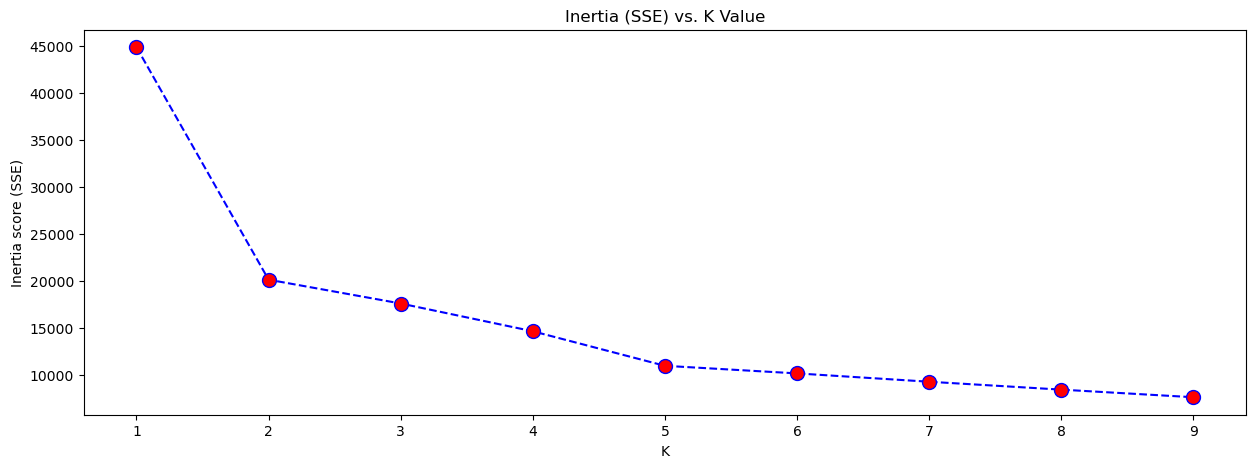

In [25]:
# Elbow method to find the optimal k
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm import tqdm # progress bar

from sklearn.cluster import KMeans

k1 = []
inertia_s1 = []

for i in tqdm(range(1,10)):
    k1.append(i)
    kmeans1 = KMeans(n_clusters=i,random_state=125,max_iter=100).fit(cluster_df)
    inertia_s1.append(kmeans1.inertia_)

# plot
plt.figure(figsize=(15,5))
plt.plot(k1,inertia_s1,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Inertia (SSE) vs. K Value')
plt.xlabel('K')
plt.ylabel('Inertia score (SSE)')

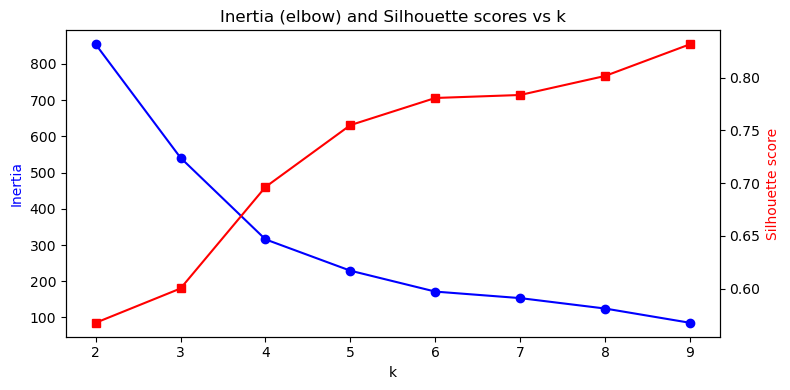

Silhouette scores: {2: 0.5676, 3: 0.6001, 4: 0.6963, 5: 0.7549, 6: 0.7806, 7: 0.7835, 8: 0.8015, 9: 0.8315}


In [26]:
# To check silhouette score for different k values
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
import numpy as np

Ks = range(2, 10)
inertias = []
sil_scores = []
X = cluster_df.copy()  # features used for clustering

for k in Ks:
    km = KMeans(n_clusters=k, random_state=42).fit(X)
    inertias.append(km.inertia_)
    sil_scores.append(silhouette_score(X, km.labels_))

fig, ax1 = plt.subplots(figsize=(8,4))
ax1.plot(Ks, inertias, 'b-o', label='Inertia')
ax1.set_xlabel('k')
ax1.set_ylabel('Inertia', color='b')
ax2 = ax1.twinx()
ax2.plot(Ks, sil_scores, 'r-s', label='Silhouette')
ax2.set_ylabel('Silhouette score', color='r')
ax1.set_xticks(list(Ks))
plt.title('Inertia (elbow) and Silhouette scores vs k')
fig.tight_layout()
plt.show()

print("Silhouette scores:", dict(zip(Ks, np.round(sil_scores, 4))))

In [37]:
# decode item names when inspecting clusters
from sklearn.cluster import KMeans

def inspect_k_decoded(k, features_df, original_df, label_encoders, item_col='Item Purchased', top_n=5):
    km = KMeans(n_clusters=k, random_state=42).fit(features_df)
    labels = km.labels_
    odf = original_df.copy()
    odf['cluster'] = labels

    le_item = label_encoders['Item Purchased']
    # make a readable column (original labels)
    odf['Item Purchased (name)'] = le_item.inverse_transform(odf[item_col].astype(int).values)

    print(f"\nk={k}  cluster counts:\n", odf['cluster'].value_counts().sort_index())
    for cid in sorted(odf['cluster'].unique()):
        top = odf.loc[odf['cluster']==cid, 'Item Purchased (name)'].value_counts().head(top_n)
        print(f"\nCluster {cid} top {top_n} items:")
        for name, cnt in top.items():
            pct = cnt / (odf['cluster']==cid).sum() * 100
            print(f"  {name}: {cnt} ({pct:.1f}%)")

# Use the same X (features) and cleaned_df (encoded ints, not scaled floats)
inspect_k_decoded(5, X, cleaned_df, label_encoders)


k=5  cluster counts:
 cluster
0    4871
1    1762
2    1270
3    3693
4    1348
Name: count, dtype: int64

Cluster 0 top 5 items:
  Shirt: 550 (11.3%)
  Sweater: 515 (10.6%)
  Pants: 511 (10.5%)
  Skirt: 484 (9.9%)
  Jeans: 475 (9.8%)

Cluster 1 top 5 items:
  Sandals: 506 (28.7%)
  Sneakers: 449 (25.5%)
  Boots: 444 (25.2%)
  Shoes: 363 (20.6%)

Cluster 2 top 5 items:
  Skirt: 82 (6.5%)
  Shirt: 81 (6.4%)
  Pants: 74 (5.8%)
  Hoodie: 72 (5.7%)
  Socks: 72 (5.7%)

Cluster 3 top 5 items:
  Sunglasses: 544 (14.7%)
  Belt: 524 (14.2%)
  Backpack: 483 (13.1%)
  Handbag: 465 (12.6%)
  Hat: 464 (12.6%)

Cluster 4 top 5 items:
  Jacket: 697 (51.7%)
  Coat: 651 (48.3%)


In [39]:
# evaluation 
features = ['Category', 'Frequency of Purchases']
X = cluster_df[features]

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import pickle
from pathlib import Path

kmeans = KMeans(n_clusters=5, random_state=42)
cluster_df['Cluster'] = kmeans.fit_predict(X)

print("k=5 silhouette:", round(silhouette_score(X, kmeans.labels_), 4))
print("sizes:", cluster_df['Cluster'].value_counts().sort_index().to_dict())

# persist model
Path("./files/model_objects").mkdir(parents=True, exist_ok=True)
with open("./files/model_objects/kmeans_model.pkl", "wb") as f:
    pickle.dump(kmeans, f)

# add labels back to your encoded data frame instead of undefined df_features
cleaned_df['Cluster'] = cluster_df['Cluster']

k=5 silhouette: 0.7549
sizes: {0: 4871, 1: 1762, 2: 1270, 3: 3693, 4: 1348}


#### Cluster Profile Report

In [45]:
import pandas as pd
import numpy as np
from sklearn.metrics import silhouette_samples

# 1. decoded reporting DataFrame (use encoded ints in cleaned_df for decoding)
decoded_df = cleaned_df.copy()
decoded_df['Cluster'] = cluster_df['Cluster'].values  # copy fitted labels

# Decode all label-encoded columns into readable "(name)" columns
def add_decoded_columns(df, encoders):
    for col, le in encoders.items():
        if col in df.columns:
            df[f"{col} (name)"] = le.inverse_transform(df[col].astype(int).values)
    return df

decoded_df = add_decoded_columns(decoded_df, label_encoders)

# 2. compute per-cluster silhouette (on the same features used for KMeans, from scaled cluster_df)
try:
    feats = features if 'features' in locals() else ['Category','Frequency of Purchases']
    # ensure pure NumPy arrays with numeric dtypes
    X_used = cluster_df[feats].astype(float).to_numpy()
    labels = cluster_df['Cluster'].astype(int).to_numpy()

    sil_samples = silhouette_samples(X_used, labels)
    sil_df = pd.DataFrame({'Cluster': labels, 'sil': sil_samples})
    sil_means = sil_df.groupby('Cluster')['sil'].mean().round(4)
except Exception as e:
    sil_means = pd.Series(dtype=float)
    print(f"Silhouette per-cluster unavailable: {e}")

profiles = []
total_n = len(decoded_df)

for cid, sub in decoded_df.groupby('Cluster', sort=True):
    n = len(sub)
    pct = round(n / total_n * 100, 2)

    top_items = sub['Item Purchased (name)'].value_counts().head(3)
    top_items_str = " | ".join([f"{itm}: {cnt} ({cnt/n:.1%})" for itm, cnt in top_items.items()])

    profile = {
        # avoid casting to int; cid may be a NumPy scalar
        "Cluster": cid,
        "Count": n,
        "Percent": pct,

        # always use decoded name columns; no else/int fallback
        "Dominant Category": sub['Category (name)'].mode(dropna=True).iloc[0],
        "Top Item": sub['Item Purchased (name)'].mode(dropna=True).iloc[0],
        #"Top 3 Items": top_items_str,

        "Top Season": sub['Season (name)'].mode(dropna=True).iloc[0],
        "Top Location": sub['Location (name)'].mode(dropna=True).iloc[0],
        "Top Gender": sub['Gender (name)'].mode(dropna=True).iloc[0],
        "Top Purchase Frequency": sub['Frequency of Purchases (name)'].mode(dropna=True).iloc[0],
        "Top Discount Applied": sub['Discount Applied (name)'].mode(dropna=True).iloc[0],
        "Top Promo Code Used": sub['Promo Code Used (name)'].mode(dropna=True).iloc[0],
        "Top Purchase Intent Category": sub['Purchase Intent Category (name)'].mode(dropna=True).iloc[0],
    }
    profiles.append(profile)
    
profile_df = pd.DataFrame(profiles)
profile_df

,Cluster,Count,Percent,Dominant Category,Top Item,Top Season,Top Location,Top Gender,Top Purchase Frequency,Top Discount Applied,Top Promo Code Used,Top Purchase Intent Category
0,0,4871,37.63,Clothing,Shirt,Spring,Spain,Male,Every 3 Months,No,No,Planned
1,1,1762,13.61,Footwear,Sandals,Spring,United States,Male,Every 3 Months,No,No,Impulsive
2,2,1270,9.81,Clothing,Skirt,Fall,Spain,Male,Quarterly,No,No,Wants-based
3,3,3693,28.53,Accessories,Sunglasses,Fall,Spain,Male,Every 3 Months,No,No,Need-based
4,4,1348,10.41,Outerwear,Jacket,Fall,Spain,Male,Every 3 Months,No,No,Impulsive


### Apriori - Association Rules

In [49]:
# Association Rule Mining
from mlxtend.frequent_patterns import apriori, association_rules
import warnings
warnings.filterwarnings('ignore', category=RuntimeWarning)

# creating a basket of items per cluster
results = []

# Use decoded_df (readable names), not scaled cluster_df
cat_cols = [
    'Gender (name)', 'Item Purchased (name)', 'Category (name)', 'Location (name)',
    'Season (name)', 'Discount Applied (name)', 'Promo Code Used (name)',
    'Purchase Intent Category (name)', 'Frequency of Purchases (name)'
]

for cluster_id in sorted(decoded_df['Cluster'].unique()):
    cluster_data = decoded_df[decoded_df['Cluster'] == cluster_id]
    print(f"Processing Cluster {cluster_id} with {len(cluster_data)} samples")

    # Skip clusters with too few samples
    if len(cluster_data) < 10:
        print(f"Skipping Cluster {cluster_id} - insufficient samples")
        continue

    # One-hot encode to strictly boolean 0/1
    onehot = pd.get_dummies(cluster_data[cat_cols], prefix=cat_cols, dtype=bool)

    # Check if we have enough variation in the data
    if onehot.values.sum() < 20:
        print(f"Skipping Cluster {cluster_id} - insufficient variation")
        continue

    try:
        # Apply Apriori algorithm
        frequent_itemsets = apriori(onehot, min_support=0.01, use_colnames=True)

        if len(frequent_itemsets) < 2:
            print(f"Skipping Cluster {cluster_id} - insufficient frequent itemsets")
            continue

        rules = association_rules(frequent_itemsets, metric="lift", min_threshold=0.5)

        if len(rules) > 0:
            top_rules = rules.sort_values(by='lift', ascending=False).head(5).copy()
            top_rules['Cluster'] = cluster_id
            results.append(top_rules)
        else:
            print(f"No rules found for Cluster {cluster_id}")

    except Exception as e:
        print(f"Error processing Cluster {cluster_id}: {e}")
        continue

# Combine all cluster rules into one DataFrame
if results:
    final_rules = pd.concat(results, ignore_index=True)
    final_rules.to_csv("cluster_apriori_rules.csv", index=False)
    summary = final_rules[['Cluster', 'antecedents', 'consequents', 'support', 'confidence', 'lift']]
    print("\nAssociation Rules Summary:")
    print(summary)
else:
    print("No association rules found for any cluster")

Processing Cluster 0 with 4871 samples
Processing Cluster 1 with 1762 samples
Processing Cluster 2 with 1270 samples
Processing Cluster 3 with 3693 samples
Processing Cluster 4 with 1348 samples

Association Rules Summary:
    Cluster                                        antecedents  \
0         0  (Purchase Intent Category (name)_Impulsive, Lo...   
1         0  (Gender (name)_Male, Frequency of Purchases (n...   
2         0  (Purchase Intent Category (name)_Impulsive, Lo...   
3         0  (Purchase Intent Category (name)_Impulsive, Lo...   
4         0  (Gender (name)_Male, Frequency of Purchases (n...   
5         1  (Frequency of Purchases (name)_Every 3 Months,...   
6         1  (Frequency of Purchases (name)_Every 3 Months,...   
7         1  (Frequency of Purchases (name)_Every 3 Months,...   
8         1  (Frequency of Purchases (name)_Every 3 Months,...   
9         1  (Frequency of Purchases (name)_Every 3 Months,...   
10        2  (Frequency of Purchases (name)_Weekly,

In [51]:
# Readable Apriori Results
rules_df = pd.read_csv("cluster_apriori_rules.csv")

# Clean text
def clean_text(text):
    text = text.replace("frozenset({", "").replace("})", "")
    text = text.replace("_", " ").replace("'", "")
    return text

rules_df['antecedents'] = rules_df['antecedents'].apply(clean_text)
rules_df['consequents'] = rules_df['consequents'].apply(clean_text)

# Create readable rule
rules_df['Rule'] = "If " + rules_df['antecedents'] + " then " + rules_df['consequents']

# Select top 3 per cluster
top_rules = rules_df.groupby('Cluster').apply(lambda x: x.nlargest(3, 'lift')).reset_index(drop=True)

# Display
top_rules[['Cluster', 'Rule', 'support', 'confidence', 'lift']].style.set_properties(
     subset=['Rule'],
     **{'white-space': 'pre-line', 'word-break': 'break-word', 'max-width': '350px'}
     )


/var/folders/4h/yv7v_s3x45ndtl40qwsynt_00000gn/T/ipykernel_56299/854238462.py:17: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  top_rules = rules_df.groupby('Cluster').apply(lambda x: x.nlargest(3, 'lift')).reset_index(drop=True)


,Cluster,Rule,support,confidence,lift
0,0,"If Purchase Intent Category (name) Impulsive, Location (name) Spain, Discount Applied (name) No then Frequency of Purchases (name) Every 3 Months, Category (name) Clothing, Gender (name) Male, Item Purchased (name) Hoodie, Promo Code Used (name) No",0.012113,1.000000,43.882883
1,0,"If Gender (name) Male, Frequency of Purchases (name) Every 3 Months, Item Purchased (name) Hoodie, Discount Applied (name) No then Purchase Intent Category (name) Impulsive, Location (name) Spain, Promo Code Used (name) No, Category (name) Clothing",0.012113,0.531532,43.882883
2,0,"If Purchase Intent Category (name) Impulsive, Location (name) Spain, Promo Code Used (name) No then Gender (name) Male, Frequency of Purchases (name) Every 3 Months, Item Purchased (name) Hoodie, Discount Applied (name) No",0.012113,1.000000,43.882883
3,1,"If Frequency of Purchases (name) Every 3 Months, Item Purchased (name) Sandals, Category (name) Footwear, Season (name) Summer, Gender (name) Male, Promo Code Used (name) No then Location (name) Egypt, Discount Applied (name) No, Purchase Intent Category (name) Planned",0.011351,1.000000,83.904762
4,1,"If Frequency of Purchases (name) Every 3 Months, Item Purchased (name) Sandals, Category (name) Footwear, Season (name) Summer, Gender (name) Male, Discount Applied (name) No then Location (name) Egypt, Promo Code Used (name) No, Purchase Intent Category (name) Planned",0.011351,1.000000,83.904762
5,1,"If Frequency of Purchases (name) Every 3 Months, Item Purchased (name) Sandals, Season (name) Summer, Gender (name) Male, Discount Applied (name) No then Location (name) Egypt, Category (name) Footwear, Promo Code Used (name) No, Purchase Intent Category (name) Planned",0.011351,1.000000,83.904762
6,2,"If Frequency of Purchases (name) Weekly, Gender (name) Male, Category (name) Footwear, Discount Applied (name) No then Item Purchased (name) Shoes, Promo Code Used (name) No",0.010236,0.520000,28.713043
7,2,"If Frequency of Purchases (name) Weekly, Gender (name) Male, Category (name) Footwear, Promo Code Used (name) No then Item Purchased (name) Shoes, Discount Applied (name) No",0.010236,0.520000,28.713043
8,2,"If Item Purchased (name) Shoes, Promo Code Used (name) No then Frequency of Purchases (name) Weekly, Gender (name) Male, Category (name) Footwear, Discount Applied (name) No",0.010236,0.565217,28.713043
9,3,"If Frequency of Purchases (name) Every 3 Months, Gender (name) Female, Location (name) United Kingdom then Purchase Intent Category (name) Impulsive, Item Purchased (name) Scarf, Season (name) Summer, Promo Code Used (name) No",0.010019,0.822222,82.066667


In [54]:
# Simple Trending Item Analysis (Alternative to Association Rules)
print("=== TRENDING ITEM ANALYSIS BY CLUSTER ===\n")

# Ensure decoded_df exists (built earlier in the Cluster Profile Report cell)
if 'decoded_df' not in globals():
    raise RuntimeError("decoded_df not found. Run the 'Cluster Profile Report' cell first.")

for cluster_id in sorted(decoded_df['Cluster'].unique()):
    cluster_data = decoded_df[decoded_df['Cluster'] == cluster_id]

    print(f"CLUSTER {cluster_id} ({len(cluster_data)} customers)")
    print("-" * 40)
    
    # Top items (use decoded names)
    top_items = cluster_data['Item Purchased (name)'].value_counts().head(3)
    print("Top Items:")
    for item, count in top_items.items():
        percentage = (count / len(cluster_data)) * 100
        print(f"  • {item}: {count} ({percentage:.1f}%)")
    
    # Dominant characteristics (use decoded name columns)
    print(f"\nDominant Characteristics:")
    print(f"  • Gender: {cluster_data['Gender (name)'].mode(dropna=True).iloc[0]}")
    print(f"  • Category: {cluster_data['Category (name)'].mode(dropna=True).iloc[0]}")
    print(f"  • Season: {cluster_data['Season (name)'].mode(dropna=True).iloc[0]}")
    print(f"  • Location: {cluster_data['Location (name)'].mode(dropna=True).iloc[0]}")
    print(f"  • Purchase Frequency: {cluster_data['Frequency of Purchases (name)'].mode(dropna=True).iloc[0]}")
    print("\n")

    # save to file
    with open("trending_item_analysis.txt", "a") as f:
        f.write(f"CLUSTER {cluster_id} ({len(cluster_data)} customers)\n")
        f.write("-" * 40 + "\n")
        f.write("Top Items:\n")
        for item, count in top_items.items():
            percentage = (count / len(cluster_data)) * 100
            f.write(f"  • {item}: {count} ({percentage:.1f}%)\n")
        f.write("\nDominant Characteristics:\n")
        f.write

=== TRENDING ITEM ANALYSIS BY CLUSTER ===

CLUSTER 0 (4871 customers)
----------------------------------------
Top Items:
  • Shirt: 550 (11.3%)
  • Sweater: 515 (10.6%)
  • Pants: 511 (10.5%)

Dominant Characteristics:
  • Gender: Male
  • Category: Clothing
  • Season: Spring
  • Location: Spain
  • Purchase Frequency: Every 3 Months


CLUSTER 1 (1762 customers)
----------------------------------------
Top Items:
  • Sandals: 506 (28.7%)
  • Sneakers: 449 (25.5%)
  • Boots: 444 (25.2%)

Dominant Characteristics:
  • Gender: Male
  • Category: Footwear
  • Season: Spring
  • Location: United States
  • Purchase Frequency: Every 3 Months


CLUSTER 2 (1270 customers)
----------------------------------------
Top Items:
  • Skirt: 82 (6.5%)
  • Shirt: 81 (6.4%)
  • Pants: 74 (5.8%)

Dominant Characteristics:
  • Gender: Male
  • Category: Clothing
  • Season: Fall
  • Location: Spain
  • Purchase Frequency: Quarterly


CLUSTER 3 (3693 customers)
----------------------------------------
To